## Data observe

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook

In [15]:
data = pd.read_hdf('data/milestone4/open0.h5', mode='r')

In [19]:
data['index'] = np.int32(range(data.shape[0]))

data['event_id'] = data['event_id'].astype(np.int32)
data['signal'] = data['signal'].astype(np.bool)
data['data_ind'] = data['data_ind'].astype(np.int32)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698798 entries, 0 to 698797
Data columns (total 9 columns):
TX          698798 non-null float32
TY          698798 non-null float32
X           698798 non-null float32
Y           698798 non-null float32
Z           698798 non-null float32
event_id    698798 non-null int32
signal      698798 non-null bool
data_ind    698798 non-null int32
index       698798 non-null int32
dtypes: bool(1), float32(5), int32(3)
memory usage: 27.3 MB


In [21]:
data.head()

,TX,TY,X,Y,Z,event_id,signal,data_ind,index
0,-0.121689,0.357254,66494.796875,74176.140625,25860.0,-999,False,0,0
1,0.040179,-0.107180,47274.550781,37472.406250,18102.0,-999,False,0,1
2,0.228571,0.223065,49311.167969,71490.804688,63357.0,-999,False,0,2
3,-0.099237,-0.138337,57166.726562,55747.062500,29739.0,-999,False,0,3
4,0.222805,0.130636,54455.746094,30725.843750,28446.0,-999,False,0,4


In [22]:
def drow_brick(data, signal=None):
    plt.figure(figsize=(16, 4))
    for i, axis in zip([1, 2], ['X','Y']):
        plt.subplot(1, 2, i)
        if (signal):
            plt.scatter(data[data.signal == signal].Z, data[data.signal == signal][axis])
        else:
            plt.scatter(data.Z, data[axis])

        plt.title('EM shower')
        plt.xlabel('Z')
        plt.ylabel(axis)

    plt.show()

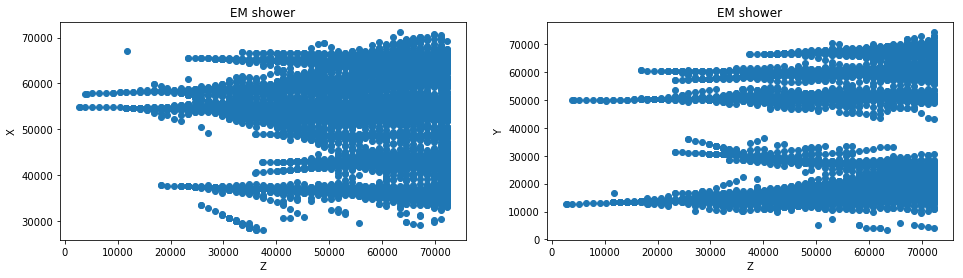

In [31]:
drow_brick(data, signal=True)

In [26]:
def draw_tan(data):
    plt.figure(figsize=(14, 4))
    
    for i, axis in zip([1, 2], ['TX','TY']):
        plt.subplot(1, 2, i)
        plt.hist(data[data.signal == True]['TY'].dropna(), bins=50, histtype="step", normed=True)
        plt.hist(data[data.signal == False]['TY'].dropna(), bins=50, histtype="step", normed=True)
        plt.title(axis + ' hist')
        plt.legend(['signal','background'])

    plt.show()

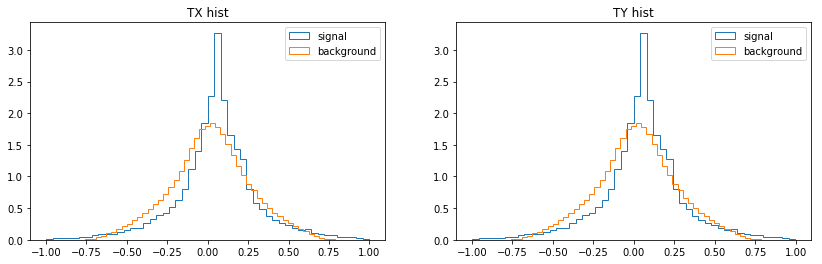

In [27]:
draw_tan(data)

In [28]:
def draw_axes(data):
    plt.figure(figsize=(18, 4))
    
    for i, axis in zip([1, 2, 3], ['X','Y','Z']):
        plt.subplot(1, 3, i)
        plt.hist(data[data.signal == True][axis], bins=58, histtype="step", normed=True)
        plt.hist(data[data.signal == False][axis], bins=58, histtype="step", normed=True)
        plt.title(axis + ' hist')
        plt.legend(['signal','background'])

    plt.show()

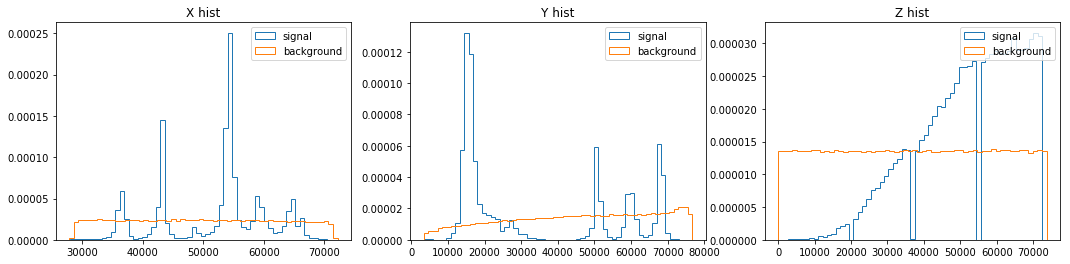

In [29]:
draw_axes(data)

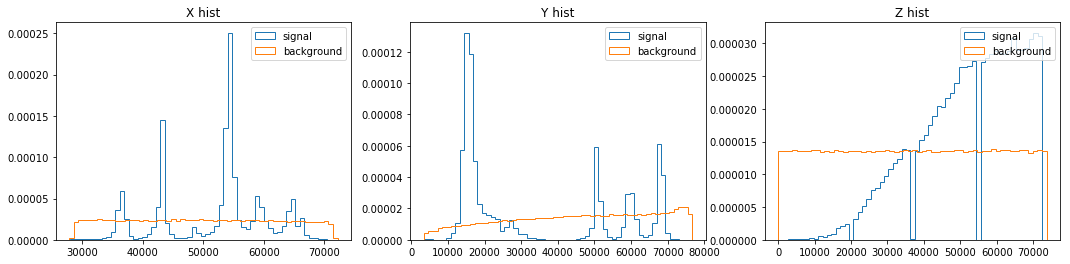

In [30]:
draw_axes(data)

## New features

In [151]:
#data = pd.read_hdf('data/milestone4/open10.h5', mode='r')
#data0 = pd.read_hdf('data/milestone4/test_close0.h5', mode='r')
data = pd.read_hdf('data/milestone4/test_close10.h5', mode='r')

In [54]:
np.unique(data.data_ind)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [152]:
num_pic = 10

In [153]:
#data['index'] = np.int32(range(data.shape[0])) #700818
data['index'] = np.int32(range(700818, 7698899)) 
data = data[(data.data_ind == num_pic) & (data.Z % 1293 == 0)]

In [154]:
#data['event_id'] = data['event_id'].astype(np.int32)
#data['signal'] = data['signal'].astype(np.bool)
data['data_ind'] = data['data_ind'].astype(np.int32)

In [58]:
data.tail()

,TX,TY,X,Y,Z,data_ind,index
705172,-0.339077,0.202979,54454.609375,77671.179688,54306.0,1,1405990
705173,-0.052269,-0.404353,92051.218750,70988.296875,43962.0,1,1405991
705174,0.047828,-0.120281,36903.773438,57858.242188,68529.0,1,1405992
705175,0.177716,-0.013430,48049.242188,67408.203125,56892.0,1,1405993
705176,0.059719,0.172786,28890.453125,55440.234375,10344.0,1,1405994


In [155]:
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if z0 == zmax:
        efr['dfore'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz))
        gfr = efr[["X1", "Y1", "X2", "Y2"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if z0 == zmin:
        eto['dback'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz))
        gfr = efr[["X1", "Y1", "X2", "Y2"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features(df):
    dx = df['TX'] * dz
    dy = df['TY'] * dz
    df['X1'] = df['X'] + dx
    df['Y1'] = df['Y'] + dy
    df['X2'] = df['X1'] + dx
    df['Y2'] = df['Y1'] + dy
    return df.groupby("Z").apply(ddmin, df)

In [156]:
zl = np.unique(data['Z'])
zmin = np.min(zl)
zmax = np.max(zl)
dz = np.diff(zl)[0]
print('zmin = {}'.format(zmin))
print('zmax = {}'.format(zmax))
print('len(zl) = {}'.format(len(zl)))
print('dz = {}'.format(dz))

zmin = 0.0
zmax = 73701.0
len(zl) = 58
dz = 1293.0


In [157]:
%time data_extended = features(data)

CPU times: user 1min 50s, sys: 208 ms, total: 1min 50s
Wall time: 1min 50s


In [158]:
dz2 = dz*2
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if (z0 == zmax) or (z0 == (zmax - 1293)):
        efr['dfore2'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz2))
        gfr = efr[["X2", "Y2", "X3", "Y3"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore2'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if (z0 == zmin) or (z0 == (zmin + 1293)):
        eto['dback2'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz2))
        gfr = efr[["X2", "Y2", "X3", "Y3"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback2'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features_2_layer(df):
    dx = df['TX'] * dz
    dy = df['TY'] * dz
    #df['X1'] = df['X'] + dx
    #df['Y1'] = df['Y'] + dy
    #df['X2'] = df['X1'] + dx
    #df['Y2'] = df['Y1'] + dy
    
    df['X3'] = df['X2'] + dx
    df['Y3'] = df['Y2'] + dy
    
    return df.groupby("Z").apply(ddmin, df)


%time data_extended2 = features_2_layer(data_extended)

CPU times: user 1min 48s, sys: 124 ms, total: 1min 48s
Wall time: 1min 48s


In [159]:
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if (z0 == zmax):
        efr['dfore_simp'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz))
        gfr = efr[["X1", "Y1"]]
        gto = eto[["X", "Y"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore_simp'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if (z0 == zmin):
        eto['dback_simp'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz))
        gfr = efr[["X1", "Y1"]]
        gto = eto[["X", "Y"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback_simp'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features_simp(df):
    return df.groupby("Z").apply(ddmin, df)


%time data_extended3 = features_simp(data_extended2)

CPU times: user 1min 18s, sys: 160 ms, total: 1min 18s
Wall time: 1min 18s


In [ ]:
data_extended3.info()

In [349]:
data_extended3.head()

,TX,TY,X,Y,Z,data_ind,index,X1,Y1,X2,Y2,dfore,dback,X3,Y3,dfore2,dback2,dfore_simp,dback_simp
4913000,0.032682,0.001637,33329.046875,45709.785156,15516.0,8,5613817,33371.304688,45711.902344,33413.562500,45714.019531,606548.062500,162819.50000,33455.820312,45716.136719,3.889101e+05,168392.53125,214533.093750,20230.628906
4913001,0.075558,-0.292736,40998.109375,29701.566406,55599.0,8,5613818,41095.804688,29323.058594,41193.500000,28944.550781,244159.734375,281761.81250,41291.195312,28566.042969,3.829907e+05,660103.18750,7602.037109,12887.770508
4913002,-0.160324,0.312165,58496.679688,71954.109375,73701.0,8,5613819,58289.382812,72357.742188,58082.085938,72761.375000,1000000.000000,481576.31250,57874.789062,73165.007812,1.000000e+06,337076.09375,1000000.000000,209786.921875
4913003,0.334896,-0.314555,84209.351562,19539.511719,31032.0,8,5613820,84642.375000,19132.791016,85075.398438,18726.070312,332944.468750,884669.18750,85508.421875,18319.349609,2.016408e+06,287981.06250,2170.766357,169729.093750
4913004,-0.209747,0.368397,76537.914062,26630.697266,64650.0,8,5613821,76266.710938,27107.033203,75995.507812,27583.369141,644783.187500,161536.53125,75724.304688,28059.705078,1.853726e+05,376198.59375,194383.171875,72766.984375


In [160]:
#data_extended3.to_hdf('data/milestone4/open{}_extended3.h5'.format(num_pic), 'key_to_store', mode='w')
data_extended3.to_hdf('data/milestone4/close{}_extended3.h5'.format(num_pic), 'key_to_store', mode='w')

In [161]:
num_pic

10

## CatBoost

In [4]:
#data0 = pd.read_hdf('data/milestone4/open0_extended3.h5', mode='r')
data1 = pd.read_hdf('data/milestone4/open1_extended3.h5', mode='r')
data2 = pd.read_hdf('data/milestone4/open2_extended3.h5', mode='r')
data3 = pd.read_hdf('data/milestone4/open3_extended3.h5', mode='r')
data4 = pd.read_hdf('data/milestone4/open4_extended3.h5', mode='r')
data5 = pd.read_hdf('data/milestone4/open5_extended3.h5', mode='r')

In [5]:
data = pd.concat([data1, data2, data3, data4, data5])

In [7]:
from catboost import CatBoostClassifier

/opt/conda/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


In [20]:
model = CatBoostClassifier(iterations=500, depth=10, learning_rate=1,
                           loss_function='CrossEntropy', logging_level='Verbose', random_seed=42, verbose=True)

#%time model.fit(X_train.values, y_train)
%time model.fit(data.drop(['event_id','signal','data_ind','index'], axis=1).values, data.signal)

Borders generated
0:	learn 0.4826380087passed: 1.67 sec	total: 1m 53s	remaining: 15h 42m 45s
1:	learn 0.3610237556passed: 1.7 sec	total: 1m 55s	remaining: 7h 57m 30s
2:	learn 0.2862961276passed: 1.6 sec	total: 1m 56s	remaining: 5h 22m 6s
3:	learn 0.2369442941passed: 1.67 sec	total: 1m 58s	remaining: 4h 4m 32s
4:	learn 0.2025860583passed: 1.75 sec	total: 2m	remaining: 3h 18m 7s
5:	learn 0.1774591525passed: 1.61 sec	total: 2m 1s	remaining: 2h 46m 59s
6:	learn 0.158462167passed: 1.57 sec	total: 2m 3s	remaining: 2h 24m 41s
7:	learn 0.14351349passed: 1.8 sec	total: 2m 5s	remaining: 2h 8m 11s
8:	learn 0.131659724passed: 1.74 sec	total: 2m 6s	remaining: 1h 55m 17s
9:	learn 0.1217919964passed: 1.67 sec	total: 2m 8s	remaining: 1h 44m 55s
10:	learn 0.1136341647passed: 1.68 sec	total: 2m 10s	remaining: 1h 36m 26s
11:	learn 0.1067019969passed: 1.78 sec	total: 2m 11s	remaining: 1h 29m 25s
12:	learn 0.1008578733passed: 1.68 sec	total: 2m 13s	remaining: 1h 23m 25s
13:	learn 0.09573012969passed: 1.57 

113:	learn 0.03484454831passed: 1.7 sec	total: 5m 3s	remaining: 17m 6s
114:	learn 0.03476782213passed: 1.69 sec	total: 5m 4s	remaining: 17m
115:	learn 0.03469301141passed: 1.67 sec	total: 5m 6s	remaining: 16m 54s
116:	learn 0.03460639587passed: 1.63 sec	total: 5m 8s	remaining: 16m 48s
117:	learn 0.03453198684passed: 1.66 sec	total: 5m 9s	remaining: 16m 42s
118:	learn 0.03445779713passed: 1.65 sec	total: 5m 11s	remaining: 16m 36s
119:	learn 0.03438798546passed: 1.71 sec	total: 5m 13s	remaining: 16m 31s
120:	learn 0.03432258594passed: 1.54 sec	total: 5m 14s	remaining: 16m 25s
121:	learn 0.03425750507passed: 1.63 sec	total: 5m 16s	remaining: 16m 19s
122:	learn 0.0341749817passed: 1.55 sec	total: 5m 17s	remaining: 16m 14s
123:	learn 0.0341055141passed: 1.7 sec	total: 5m 19s	remaining: 16m 8s
124:	learn 0.03404233207passed: 1.55 sec	total: 5m 21s	remaining: 16m 3s
125:	learn 0.03398092517passed: 1.48 sec	total: 5m 22s	remaining: 15m 57s
126:	learn 0.03391566533passed: 1.77 sec	total: 5m 24s

225:	learn 0.03000604904passed: 1.51 sec	total: 8m 5s	remaining: 9m 48s
226:	learn 0.02998410538passed: 1.65 sec	total: 8m 6s	remaining: 9m 45s
227:	learn 0.02996394086passed: 1.5 sec	total: 8m 8s	remaining: 9m 42s
228:	learn 0.02994021104passed: 1.7 sec	total: 8m 9s	remaining: 9m 39s
229:	learn 0.02991638639passed: 1.52 sec	total: 8m 11s	remaining: 9m 36s
230:	learn 0.02989652492passed: 1.66 sec	total: 8m 13s	remaining: 9m 34s
231:	learn 0.02987646904passed: 1.7 sec	total: 8m 14s	remaining: 9m 31s
232:	learn 0.02985618146passed: 1.7 sec	total: 8m 16s	remaining: 9m 28s
233:	learn 0.0298259532passed: 1.71 sec	total: 8m 18s	remaining: 9m 26s
234:	learn 0.02980635623passed: 1.65 sec	total: 8m 19s	remaining: 9m 23s
235:	learn 0.0297819276passed: 1.71 sec	total: 8m 21s	remaining: 9m 21s
236:	learn 0.02976210622passed: 1.82 sec	total: 8m 23s	remaining: 9m 18s
237:	learn 0.02974273078passed: 1.66 sec	total: 8m 25s	remaining: 9m 15s
238:	learn 0.029708602passed: 1.65 sec	total: 8m 26s	remainin

338:	learn 0.02805179745passed: 1.59 sec	total: 11m 8s	remaining: 5m 17s
339:	learn 0.02803519939passed: 1.6 sec	total: 11m 9s	remaining: 5m 15s
340:	learn 0.02802431705passed: 1.59 sec	total: 11m 11s	remaining: 5m 13s
341:	learn 0.02800658706passed: 1.6 sec	total: 11m 12s	remaining: 5m 10s
342:	learn 0.02799486829passed: 1.73 sec	total: 11m 14s	remaining: 5m 8s
343:	learn 0.02798411517passed: 1.6 sec	total: 11m 16s	remaining: 5m 6s
344:	learn 0.02797242077passed: 1.76 sec	total: 11m 18s	remaining: 5m 4s
345:	learn 0.02796047536passed: 1.58 sec	total: 11m 19s	remaining: 5m 2s
346:	learn 0.0279445481passed: 1.59 sec	total: 11m 21s	remaining: 5m
347:	learn 0.02793420863passed: 1.54 sec	total: 11m 22s	remaining: 4m 58s
348:	learn 0.02792120428passed: 1.83 sec	total: 11m 24s	remaining: 4m 56s
349:	learn 0.02790831222passed: 1.62 sec	total: 11m 26s	remaining: 4m 54s
350:	learn 0.02789185264passed: 1.71 sec	total: 11m 27s	remaining: 4m 52s
351:	learn 0.02787859412passed: 1.64 sec	total: 11m 

450:	learn 0.02688487686passed: 1.62 sec	total: 14m 7s	remaining: 1m 32s
451:	learn 0.02687796957passed: 1.62 sec	total: 14m 9s	remaining: 1m 30s
452:	learn 0.02686827465passed: 1.54 sec	total: 14m 11s	remaining: 1m 28s
453:	learn 0.02685725378passed: 1.7 sec	total: 14m 12s	remaining: 1m 26s
454:	learn 0.02685144759passed: 1.72 sec	total: 14m 14s	remaining: 1m 24s
455:	learn 0.02684235463passed: 1.63 sec	total: 14m 16s	remaining: 1m 22s
456:	learn 0.02683500457passed: 1.57 sec	total: 14m 17s	remaining: 1m 20s
457:	learn 0.02682508386passed: 1.69 sec	total: 14m 19s	remaining: 1m 18s
458:	learn 0.02681975636passed: 1.77 sec	total: 14m 21s	remaining: 1m 16s
459:	learn 0.02681330638passed: 1.55 sec	total: 14m 22s	remaining: 1m 15s
460:	learn 0.02680310545passed: 1.86 sec	total: 14m 24s	remaining: 1m 13s
461:	learn 0.02679575082passed: 1.57 sec	total: 14m 26s	remaining: 1m 11s
462:	learn 0.02678965478passed: 1.75 sec	total: 14m 27s	remaining: 1m 9s
463:	learn 0.02678456683passed: 1.69 sec	t

## Open test

In [12]:
from sklearn.metrics import roc_auc_score

In [8]:
data6 = pd.read_hdf('data/milestone4/open6_extended3.h5', mode='r')
data7 = pd.read_hdf('data/milestone4/open7_extended3.h5', mode='r')
data8 = pd.read_hdf('data/milestone4/open8_extended3.h5', mode='r')
data9 = pd.read_hdf('data/milestone4/open9_extended3.h5', mode='r')
data10 = pd.read_hdf('data/milestone4/open10_extended3.h5', mode='r')

In [9]:
data_test = pd.concat([data6, data7, data8, data9, data10])

In [21]:
%time predict = model.predict_proba(data_test.drop(['event_id','signal','data_ind','index'], axis=1).values)[:,1]
%time roc_auc_score(data_test.signal, predict)

CPU times: user 1min 9s, sys: 3.14 s, total: 1min 12s
Wall time: 1min 12s
CPU times: user 1.24 s, sys: 4 ms, total: 1.24 s
Wall time: 1.24 s


0.97535604915987806

0.95375680185860001 iter=20, depth=3, 10% signals
0.97075916276167629 iter=20, depth=8, 10% signals
0.9727042293224768 iter=20, depth=10, 10% signals
0.97535604915987806 

## Close test

In [162]:
data0 = pd.read_hdf('data/milestone4/close0_extended3.h5', mode='r')
data1 = pd.read_hdf('data/milestone4/close1_extended3.h5', mode='r')
data2 = pd.read_hdf('data/milestone4/close2_extended3.h5', mode='r')
data3 = pd.read_hdf('data/milestone4/close3_extended3.h5', mode='r')
data4 = pd.read_hdf('data/milestone4/close4_extended3.h5', mode='r')
data5 = pd.read_hdf('data/milestone4/close5_extended3.h5', mode='r')
data6 = pd.read_hdf('data/milestone4/close6_extended3.h5', mode='r')
data7 = pd.read_hdf('data/milestone4/close7_extended3.h5', mode='r')
data8 = pd.read_hdf('data/milestone4/close8_extended3.h5', mode='r')
data9 = pd.read_hdf('data/milestone4/close9_extended3.h5', mode='r')
data10 = pd.read_hdf('data/milestone4/close10_extended3.h5', mode='r')

In [163]:
df_test = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10 ])

In [164]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698763 entries, 0 to 6998080
Data columns (total 19 columns):
TX            float32
TY            float32
X             float32
Y             float32
Z             float32
data_ind      int32
index         int32
X1            float32
Y1            float32
X2            float32
Y2            float32
dfore         float32
dback         float32
X3            float32
Y3            float32
dfore2        float32
dback2        float32
dfore_simp    float32
dback_simp    float32
dtypes: float32(17), int32(2)
memory usage: 616.7 MB


In [169]:
%time df_test['signal'] = model.predict_proba(df_test.drop(['data_ind','index'], axis=1).values)[:,1]

CPU times: user 2min 31s, sys: 25.1 s, total: 2min 56s
Wall time: 2min 56s


In [258]:
%time df_test['signal'] = model.predict_proba(df_test.drop(['data_ind','index','signal'], axis=1).values)[:,1]

CPU times: user 2min 25s, sys: 22.6 s, total: 2min 48s
Wall time: 2min 48s


In [170]:
result = pd.DataFrame()
result['index'] = range(7698899)

In [171]:
result = pd.merge(result, df_test[['index','signal']], how='left', on='index')
result = result.fillna(1.0)

In [178]:
result = result.rename(columns={'index': 'id'})

In [172]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698899 entries, 0 to 7698898
Data columns (total 2 columns):
index     int64
signal    float64
dtypes: float64(1), int64(1)
memory usage: 176.2 MB


In [179]:
result.head()

,id,signal
0,0,0.003854
1,1,0.001983
2,2,0.002301
3,3,0.002867
4,4,0.002015


In [180]:
result.to_csv('~/data/milestone4/result.csv', index=False)

public: 0.95882 privat: 0.95452